In [67]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import resample

## Example 5.1 Demonstration of aliasing: Case A
주어진 신호가 제대로 샘플링 된 후 fft를 했다면, 20, 80, 120의 주파수가 나와야한다. \
하지만 aliasing 현상이 발생하여 제대로 표현되지 않는다.

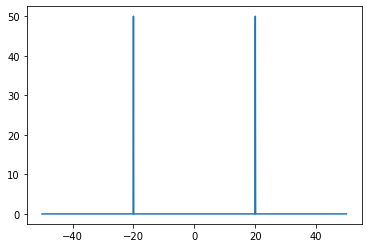

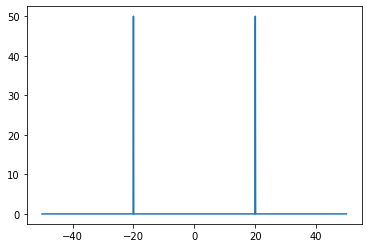

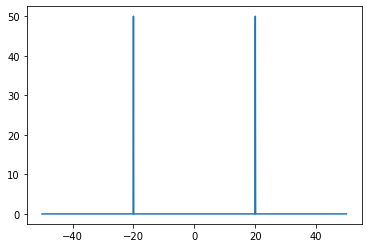

In [97]:
fs = 100
T = 10
t = np.arange(0, T, 1/fs)
p1, p2, p3 = 20, 80, 120

pi = np.pi
x1 = np.sin(2 * pi * p1 * t)
x2 = np.sin(2 * pi * p2 * t)
x3 = np.sin(2 * pi * p3 * t)

N = len(t)
X1 = fftshift(fft(x1))
X2 = fftshift(fft(x2))
X3 = fftshift(fft(x3))
f = np.arange(-fs / 2, fs / 2, fs / N)

plt.plot(f, np.abs(X1) / (fs / T))
# plt.axis([0, 100, 0, 0.55])
plt.show()

plt.plot(f, np.abs(X2) / (fs / T))
# plt.axis([0, 100, 0, 0.55])
plt.show()

plt.plot(f, np.abs(X3) / (fs / T))
# plt.axis([0, 100, 0, 0.55])
plt.show()

## Example 5.2 Demonstration of aliasing: Case B
주파수가 40이기 때문에 샘플링 레이트가 500Hz, 100Hz, 50Hz 인 경우 50Hz인 경우에만 aliasing 발생

5000 1000 500


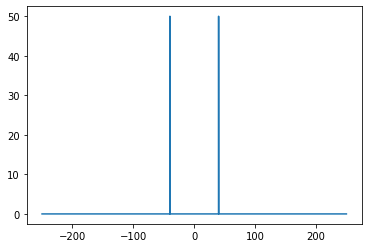

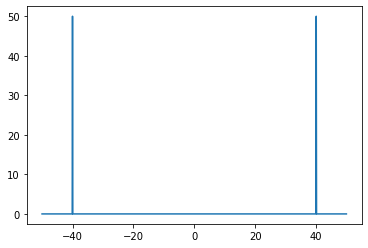

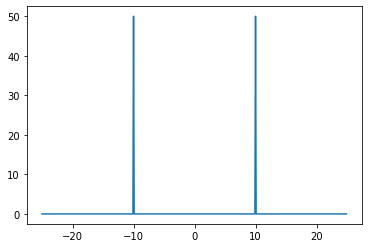

In [96]:
fs = 500
T = 10
t = np.arange(0, T, 1/fs)
p = 40
x = np.sin(2 * np.pi * p * t)

x1 = x[0::5]
x2 = x[0::10]

N, N1, N2 = len(x), len(x1), len(x2)
print(N, N1, N2)
X, X1, X2 = fftshift(fft(x)), fftshift(fft(x1)), fftshift(fft(x2))
f = np.arange(-fs/2, fs/2, fs/N)
f1 = np.arange(-100/2, 100/2, 100/N1)
f2 = np.arange(-50/2, 50/2, 50/N2)

plt.plot(f, abs(X) / (fs/T))
plt.show()
plt.plot(f1, abs(X1) / (100/T))
plt.show()
plt.plot(f2, abs(X2) / (50/T))
plt.show()


## Example 5.3 Demonstration of 'digital' anti-aliasing filtering

5000 1000 500


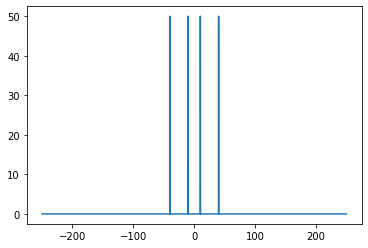

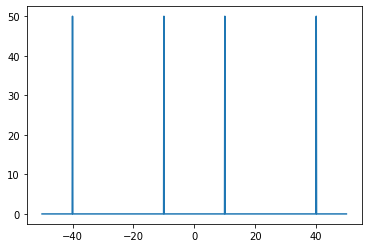

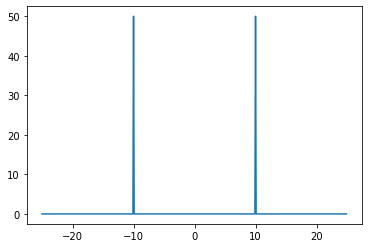

In [98]:
fs = 500
T = 10
t = np.arange(0, T, 1/fs)
p1, p2 = 10, 40
x = np.sin(2 * np.pi * p1 * t) + np.sin(2 * np.pi * p2 * t)

# digital anti-aliasing filter
x1 = resample(x, int(T * (fs / 5)))  # fs = 100
x2 = resample(x, int(T * (fs / 10)))  # fs = 50

N, N1, N2 = len(x), len(x1), len(x2)
print(N, N1, N2)
X, X1, X2 = fftshift(fft(x)), fftshift(fft(x1)), fftshift(fft(x2))
f = np.arange(-fs/2, fs/2, fs/N)
f1 = np.arange(-100/2, 100/2, 100/N1)
f2 = np.arange(-50/2, 50/2, 50/N2)

plt.plot(f, abs(X) / (fs/T))
plt.show()
plt.plot(f1, abs(X1) / (100/T))
plt.show()
plt.plot(f2, abs(X2) / (50/T))
plt.show()
